# Visualization and Communication

Zhentao Shi

<!-- code is tested on SCRP -->

## Graphs

* "One picture is worth ten thousand words".
* Modern graphs: web-based, interactive.

* Academia
* Journalism: Economist, SCMP, ...

## Plot()

* `plt` is a generic command for graphs in `python`.
  * For preliminary statistical graphs.

* `plt.show（）` for display

### Here we need to change the link to the actual link we want to use
### The connection doesn't work for hy， please check it.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert R code to Python
USDJPY = pd.read_csv('https://www.quandl.com/api/v3/datasets/BOE/XUDLJYD.csv?api_key=YOUR_API_KEY')
HKDJPY = pd.read_csv('https://www.quandl.com/api/v3/datasets/BOE/XUDLJHK.csv?api_key=YOUR_API_KEY')

# Assuming you have your Quandl API key, replace 'YOUR_API_KEY' with your actual API key

# Plotting
plt.plot(USDJPY['Date'], USDJPY['Value'], label='USD/JPY')
plt.plot(HKDJPY['Date'], HKDJPY['Value'] * 7.8, label='HKD/JPY * 7.8')
plt.xlabel('Time')
plt.legend()
plt.show()


## plotnine

### need to change the description here because the ggplot2 is not available for python

* Many proposals to enhance `plot`
* `ggplot2` is the most successful. 

* Advanced system for high-quality statistical graphs.
* Many details  
  * Reference: [**ggplot2 book**](http://link.springer.com/book/10.1007%2F978-0-387-98141-3),
  * Downloadable inside CUHK campus network (VPN needed).


## Syntax

* `ggplot()` specifies which dataset to use for the graph.
* `geom_XXX()` determines the shape to draw,  
  *  scatter dots
  *  lines
  *  curves or areas...

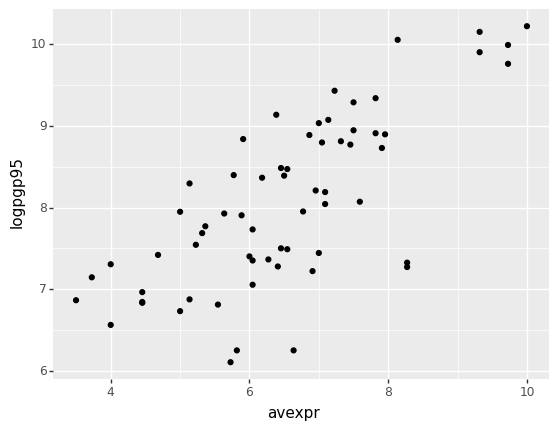

<ggplot: (119271941205)>

In [1]:
from plotnine import ggplot, aes, geom_point
import pandas as pd

# Load the data
d0 = pd.read_csv("data_example/AJR.csv")

# Create the plot
ggplot(d0) + geom_point(mapping=aes(x='avexpr', y='logpgp95'))


### Bank Marketing Data


In [7]:
import pandas as pd

# Read the CSV file
bank_0 = pd.read_csv("data_example/bank-full.csv",sep=";")

# Get the dimensions of the dataframe
dimensions = bank_0.shape
print(dimensions)


(45211, 17)


In [8]:
bank_0

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


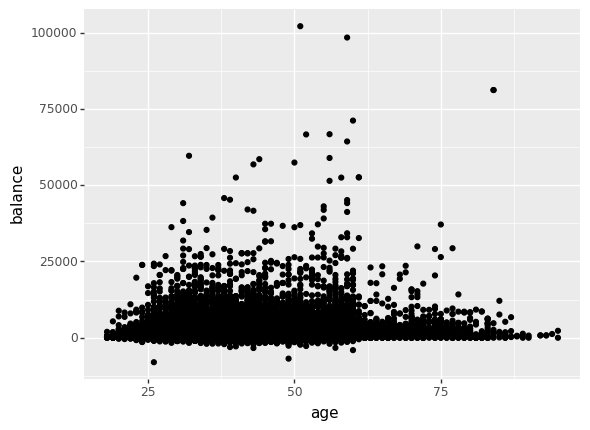

In [9]:
from plotnine import ggplot, aes, geom_point

# Scatter plot
p1 = ggplot(data=bank_0) + geom_point(mapping=aes(x='age', y='balance'))
print(p1)

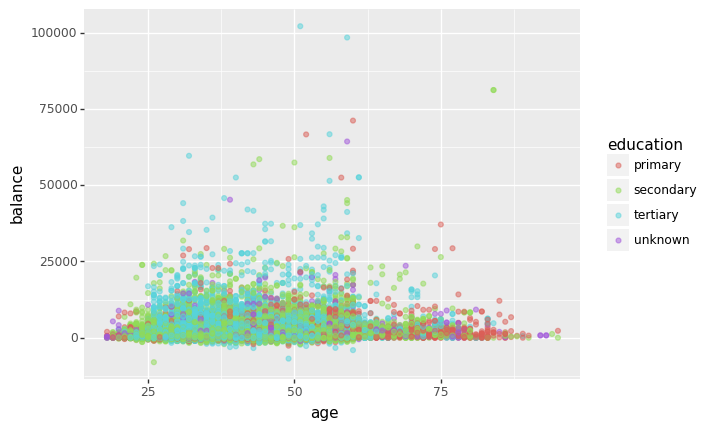

In [10]:
from plotnine import ggplot, aes, geom_point

# Scatter plot with groups
p2 = ggplot(data=bank_0) + geom_point(mapping=aes(x='age', y='balance', color='education'), alpha=0.5)
print(p2)

### Subgraphs

* Subgraphs convey rich information and easy comparison.
* `ggplot2` is good at drawing multiple graphs, either of the same pattern or of
different patterns. 


#### This code still has some issues

In [22]:
from plotnine import ggplot, aes, geom_point, facet_wrap

# Scatter plot with facetting
p3 = ggplot(data=bank_0) + geom_point(mapping=aes(x='education', y='balance', color='education', martial='martial'), alpha=0.5) + facet_wrap('~ martial + education')
print(p3)

PlotnineError: 'At least one layer must contain all variables used for facetting'

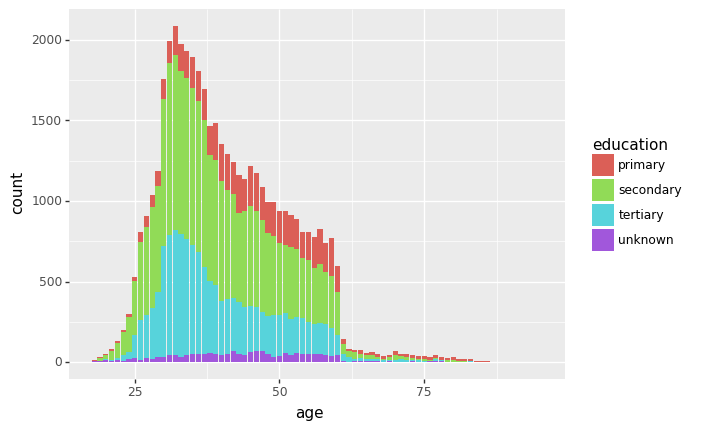

<ggplot: (119277460529)>

In [13]:
from plotnine import ggplot, aes, geom_bar

# Bar plot of educational levels in each age group
ggplot(data=bank_0) + geom_bar(mapping=aes(x='age', fill='education'))

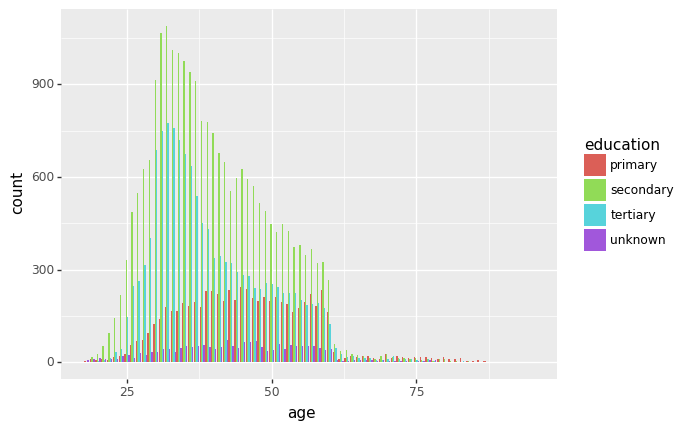

In [14]:
from plotnine import ggplot, aes, geom_bar, position_dodge

# Dodged bar plot of educational levels in each age group
p4 = ggplot(data=bank_0) + geom_bar(mapping=aes(x='age', fill='education'), position=position_dodge())
print(p4)

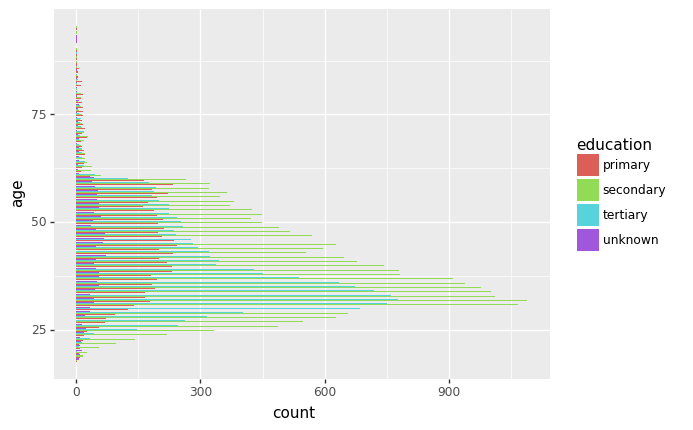

In [15]:
from plotnine import ggplot, aes, geom_bar, position_dodge, coord_flip

# Dodged bar plot of educational levels in each age group with flipped coordinates
p5 = p4 + coord_flip()
print(p5)

## Tidy data

* ggplot adds elements in a graph one by one, and then print out the graph all together.

* `ggplot2` accommodates data frames of a particular format. 
* `tidyr` is a package that helps prepare the data frames.


* Example: [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)

In [23]:
import pandas as pd

# Read the CSV file
d0 = pd.read_csv("data_example/PWT100.csv")

# Display the first few rows
print(d0.head())

# Display the column names
print(d0.columns)

  countrycode country   currency_unit  year  rgdpe  rgdpo  pop  emp  avh  hc   
0         ABW   Aruba  Aruban Guilder  1950    NaN    NaN  NaN  NaN  NaN NaN  \
1         ABW   Aruba  Aruban Guilder  1951    NaN    NaN  NaN  NaN  NaN NaN   
2         ABW   Aruba  Aruban Guilder  1952    NaN    NaN  NaN  NaN  NaN NaN   
3         ABW   Aruba  Aruban Guilder  1953    NaN    NaN  NaN  NaN  NaN NaN   
4         ABW   Aruba  Aruban Guilder  1954    NaN    NaN  NaN  NaN  NaN NaN   

   ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  pl_x  pl_m  pl_n  pl_k  
0  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 52 columns]
Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe

In [24]:
import pandas as pd

# Select specific columns, filter countries, and calculate gdpcapita
d1 = d0[['countrycode', 'year', 'rgdpe', 'pop']]
d1 = d1[d1['countrycode'].isin(['CHN', 'RUS', 'JPN', 'USA'])]
d1['gdpcapita'] = d1['rgdpe'] / d1['pop']

# Print the resulting dataset
print(d1)

      countrycode  year        rgdpe         pop     gdpcapita
2310          CHN  1950          NaN         NaN           NaN
2311          CHN  1951          NaN         NaN           NaN
2312          CHN  1952    554906.44  579.577178    957.433214
2313          CHN  1953    626291.13  589.316981   1062.740682
2314          CHN  1954    584967.13  599.942909    975.037993
...           ...   ...          ...         ...           ...
12175         USA  2015  18905122.00  320.878310  58916.796215
12176         USA  2016  19285252.00  323.015995  59703.706004
12177         USA  2017  19754754.00  325.084756  60768.010912
12178         USA  2018  20369440.00  327.096265  62273.532839
12179         USA  2019  20860506.00  329.064917  63393.284797

[280 rows x 5 columns]


d:\Users\AW\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 42 rows containing missing values.


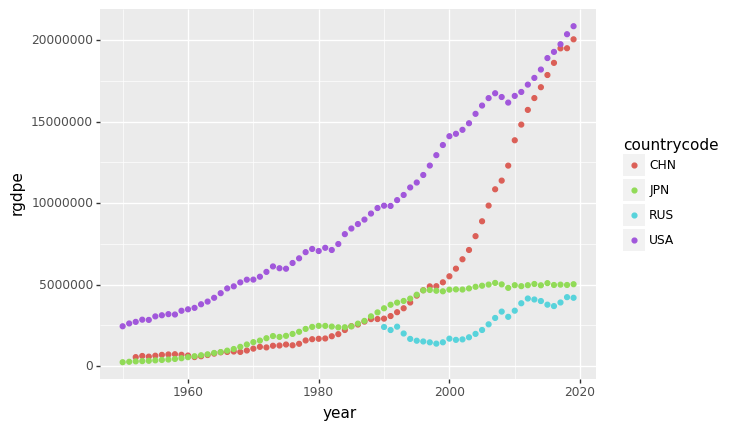

<ggplot: (119284550777)>

In [25]:
from plotnine import ggplot, aes, geom_point

# Scatter plot
ggplot(d1) + geom_point(mapping=aes(x='year', y='rgdpe', color='countrycode'))

d:\Users\AW\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


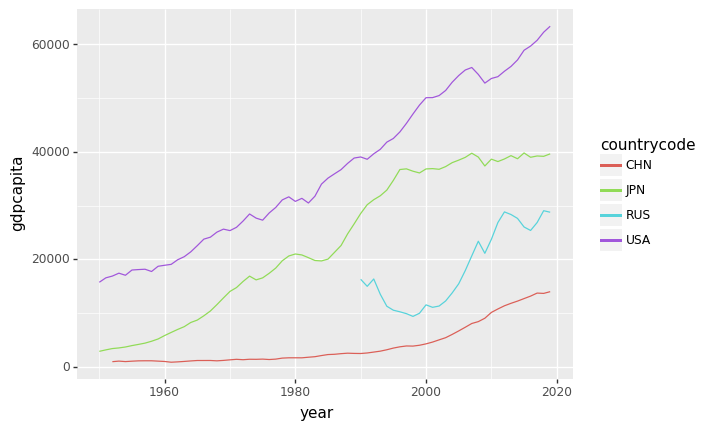

<ggplot: (119284550497)>

In [26]:
from plotnine import ggplot, aes, geom_line

# Line plot
ggplot(d1) + geom_line(mapping=aes(x='year', y='gdpcapita', color='countrycode'))

In [27]:
import pandas as pd

# Reshape the DataFrame
s1 = d1[['countrycode', 'year', 'pop']].pivot(index='countrycode', columns='year', values='pop')

# Print the resulting DataFrame
print(s1)

year               1950        1951        1952        1953        1954   
countrycode                                                               
CHN                 NaN         NaN  579.577178  589.316981  599.942909  \
JPN           84.274267   85.640724   86.943150   88.145992   89.250869   
RUS                 NaN         NaN         NaN         NaN         NaN   
USA          155.583973  158.247704  160.980892  163.669147  166.572976   

year               1955        1956        1957        1958        1959  ...   
countrycode                                                              ...   
CHN          612.053060  624.568161  638.770299  652.377171  660.090622  ...  \
JPN           90.317983   91.274458   92.075719   92.906103   93.818977  ...   
RUS                 NaN         NaN         NaN         NaN         NaN  ...   
USA          169.541179  172.577841  175.725868  178.686931  181.699069  ...   

year                2010         2011         2012         2013     

In [31]:
import pandas as pd

# Reshape the DataFrame
s1 = s1.reset_index()
s1 = s1.melt(id_vars=['countrycode'], var_name='year', value_name='pop')

# Print the resulting DataFrame
print(s1)

    countrycode  year          pop
0           CHN  1950          NaN
1           JPN  1950    84.274267
2           RUS  1950          NaN
3           USA  1950   155.583973
4           CHN  1951          NaN
..          ...   ...          ...
275         USA  2018   327.096265
276         CHN  2019  1433.783686
277         JPN  2019   126.860301
278         RUS  2019   145.872256
279         USA  2019   329.064917

[280 rows x 3 columns]


### Subgraphs of the same pattern


* Example: Plot the density of two estimators under three different data generating processes.



In [33]:
import pyreadr

# Load the R data file
result = pyreadr.read_r("data_example/big150.Rdata")

# Extract the DataFrame from the result
big150 = result['big150']

# Display the first few rows
print(big150.head())

  numb typb        b1        b2      b1_c      b2_c       sd1       sd2
0  150   FE  0.124616  0.052590  0.116904  0.004897  0.076338  0.081810
1  150   FE  0.267670  0.018358  0.252028 -0.014436  0.076894  0.082305
2  150   FE -0.030689 -0.028174 -0.039767 -0.003876  0.076620  0.082174
3  150   FE  0.121170  0.063783  0.118661  0.018427  0.076833  0.081975
4  150   FE  0.008300  0.005754 -0.023997  0.013997  0.076927  0.081581


In [35]:
# Select specific columns and gather the data
big150_1 = big150[['typb', 'b1', 'b1_c']].melt(id_vars=['typb', 'b1'], var_name='estimator', value_name='value')

# Display the first few rows
print(big150_1.head())


  typb        b1 estimator     value
0   FE  0.124616      b1_c  0.116904
1   FE  0.267670      b1_c  0.252028
2   FE -0.030689      b1_c -0.039767
3   FE  0.121170      b1_c  0.118661
4   FE  0.008300      b1_c -0.023997


`theme` is to tune the supplementary elements like the background, the size and font of the axis text and so on.

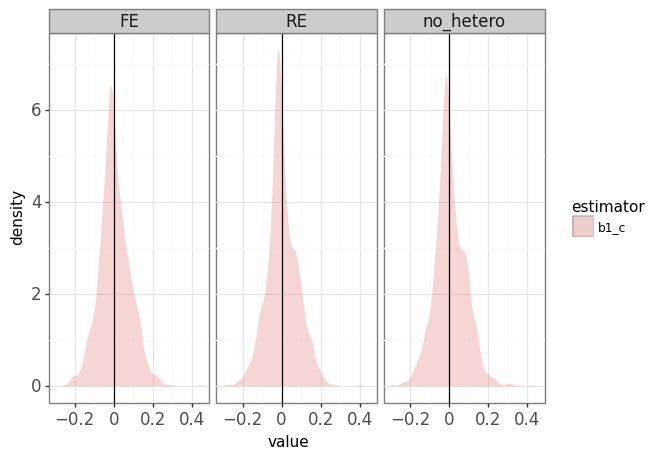

In [36]:
from plotnine import ggplot, aes, geom_area, facet_grid, geom_vline, theme_bw, theme, element_text

p1 = (
    ggplot(big150_1, aes(x='value', fill='estimator'))
    + geom_area(stat='density', alpha=.25, position='identity')
    + facet_grid('. ~ typb')
    + geom_vline(xintercept=0)
    + theme_bw()
    + theme(strip_text=element_text(size=12), axis_text=element_text(size=12))
)

print(p1)


### Example

* This example aligns two graphs of different patterns in one page.
  * Similar graphs appear in [Shi and Zheng, 2018](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.2640).
  * To unify the theme of the two subgraphs,
define an object `theme1` and apply it in both graphic objects
`p1` and `p2`.



In [40]:
import pyreadr
import pandas as pd
from plotnine import theme_bw, theme, element_text, element_blank

# Load data
result = pyreadr.read_r('data_example/multigraph.Rdata')

theme1 = theme_bw() + theme(
    axis_title_x = element_blank(),
    strip_text = element_text(size=12),
    axis_text = element_text(size=12),
    legend_position = "bottom", 
    legend_title = element_blank()
)

#### This code has some issues

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from plotnine import ggplot, aes, geom_line, labs

# sub-graph 1
d1 = pd.DataFrame({'month': range(1, 481), 'm': m_vec})
p1 = (
    ggplot(d1, aes(x='month', y='m')) 
    + geom_line()
    + theme1
    + labs(y='fraction of chartists')
)

# sub-graph 2
d2['month'] = range(1, 481)
p2 = (
    ggplot(d2) 
    + geom_line(aes(x='month', y='value', color='variable'))
    + theme1
    + labs(y='price and fundamental')
)

# generate the graph
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
p1.draw(); plt.title(''); plt.xlabel(''); plt.ylabel('fraction of chartists')

ax2 = fig.add_subplot(gs[1, 0])
p2.draw(); plt.title(''); plt.xlabel(''); plt.ylabel('price and fundamental')

plt.show()

NameError: name 'm_vec' is not defined

## Interactive Graph

* Users provides customized inputs
* Graph presents corresponding outcome

* `flexboard.Rmd` is an example.
* Easy to convert a ggplot2 graph with `plotly::ggplotly()`.



## R Markdown

* Provide R-basics from previous version of rmd file.

Notebooks

* Rmd format
* Ipynb format

## Shiny App

Web-based R package for interactive graph. 


* [tutorial](https://shiny.rstudio.com/tutorial/)


* `UI`: interface
* `Server`: calculation of input data


### Example


* [Shenzhen housing price](https://zhentao-shi.shinyapps.io/ShenzhenHousing-Shiny/)
  * [code](https://github.com/metricshilab/Shenzhen-Housing)
* [HP filter](https://zwmei-metrics.shinyapps.io/boosted_hp_app/)
  * [code](https://github.com/metricshilab/Boosted_HP_App)

**Also, see my script of Newton's method.**

## Reading

* Wickham and Grolemund](https://r4ds.had.co.nz/)
  * Ch 3: data visualization
  * Ch.12: tidy data
  * Ch 27: R markdown
  * Ch 28: graphics for communication
  * Ch 29: R markdown formats
  * Ch 30: R markdown workflow
  
* This [link](https://cosx.org/2023/02/earthquake/) is a good example of using `ggplot2` to draw nice statistical graphs.